In [2]:
#!pip install umap-learn scikit-learn matplotlib pandas


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler

def visualize_feature_reduction(
    source, 
    label_from_path=True, 
    random_state=42,
    sample_size=None  # np. 1000 jeśli chcesz wziąć tylko próbkę
):
    # 1. Wczytywanie danych
    if source.endswith(".csv"):
        df = pd.read_csv(source)
    else:
        folder_name = os.path.basename(source.strip("/\\"))
        csv_name = f"data_tables/features_from_{folder_name}.csv"
        df = pd.read_csv(csv_name)

    # 2. Ewentualne etykiety klas
    if label_from_path and "path" in df.columns:
        df["label"] = df["path"].apply(lambda p: os.path.normpath(p).split(os.sep)[-2])
    else:
        df["label"] = "unknown"

    # 3. Wybieramy tylko cechy numeryczne
    X = df.select_dtypes(include="number")

    # 4. Ewentualne próbkowanie
    if sample_size is not None and sample_size < len(X):
        df = df.sample(sample_size, random_state=random_state)
        X = X.loc[df.index]

    # 5. Standaryzacja
    X_scaled = StandardScaler().fit_transform(X)

    # 6. Redukcje
    reducers = {
        "PCA": PCA(n_components=2, random_state=random_state),
        "t-SNE": TSNE(n_components=2, random_state=random_state, perplexity=30),
        "UMAP": umap.UMAP(n_components=2, random_state=random_state)
    }

    plt.figure(figsize=(15, 4))

    for i, (name, reducer) in enumerate(reducers.items()):
        embedding = reducer.fit_transform(X_scaled)
        plt.subplot(1, 3, i+1)
        scatter = plt.scatter(
            embedding[:, 0], embedding[:, 1], 
            c=pd.factorize(df["label"])[0], cmap="tab20", s=10, alpha=0.7
        )
        plt.title(name)
        plt.xlabel("Dim 1")
        plt.ylabel("Dim 2")
    
    plt.tight_layout()
    plt.show()


c:\Users\66891\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Wizualizacja dla: data_tables\features_from_Backup.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


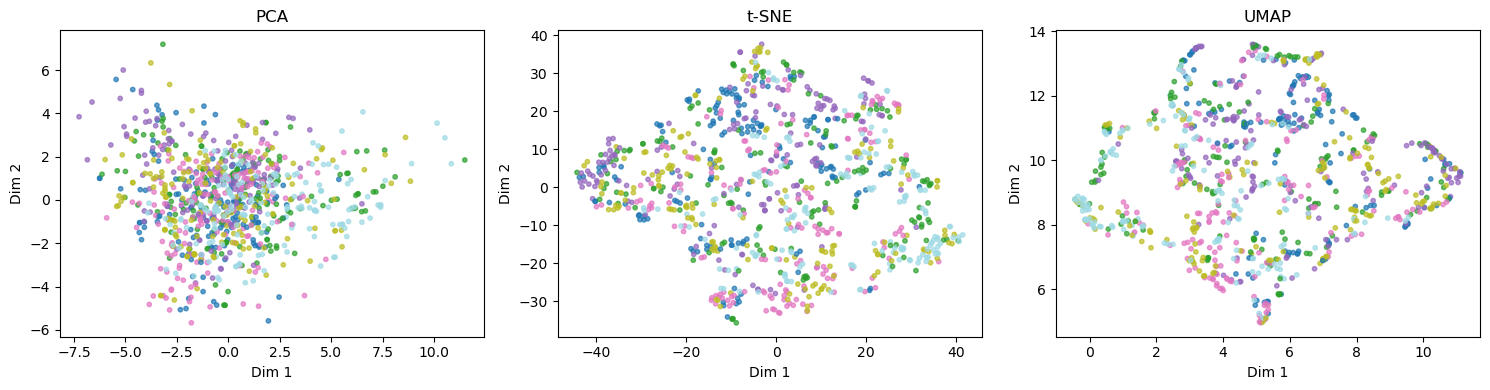

Wizualizacja dla: data_tables\features_from_CLAHE_Color.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


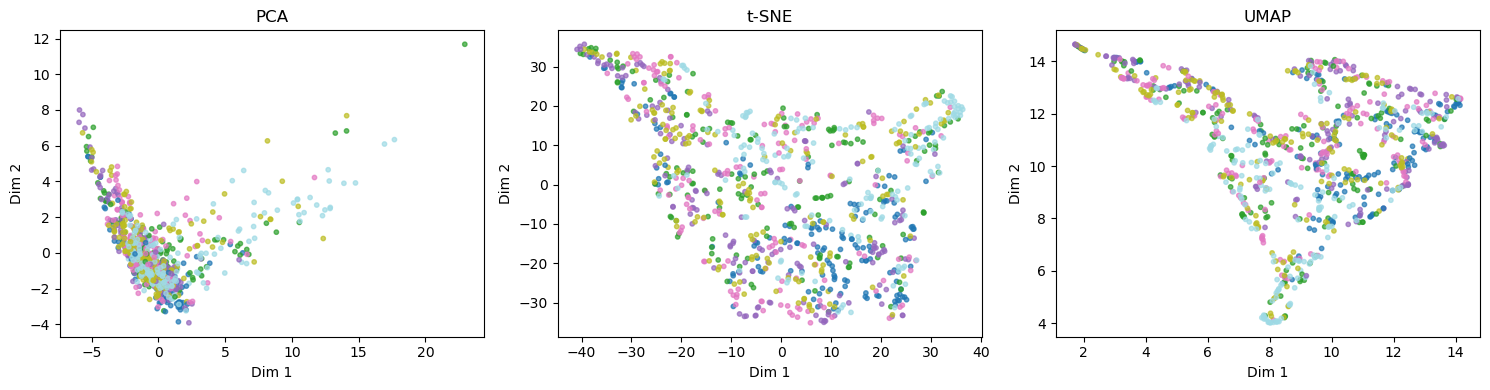

Wizualizacja dla: data_tables\features_from_Equalized2_Color.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


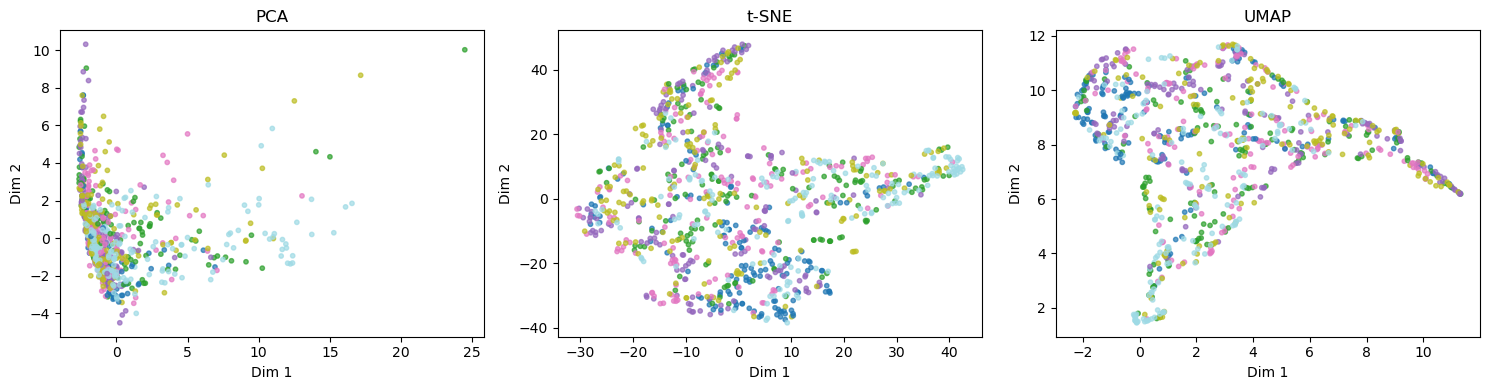

Wizualizacja dla: data_tables\features_from_Equalized_Copy.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


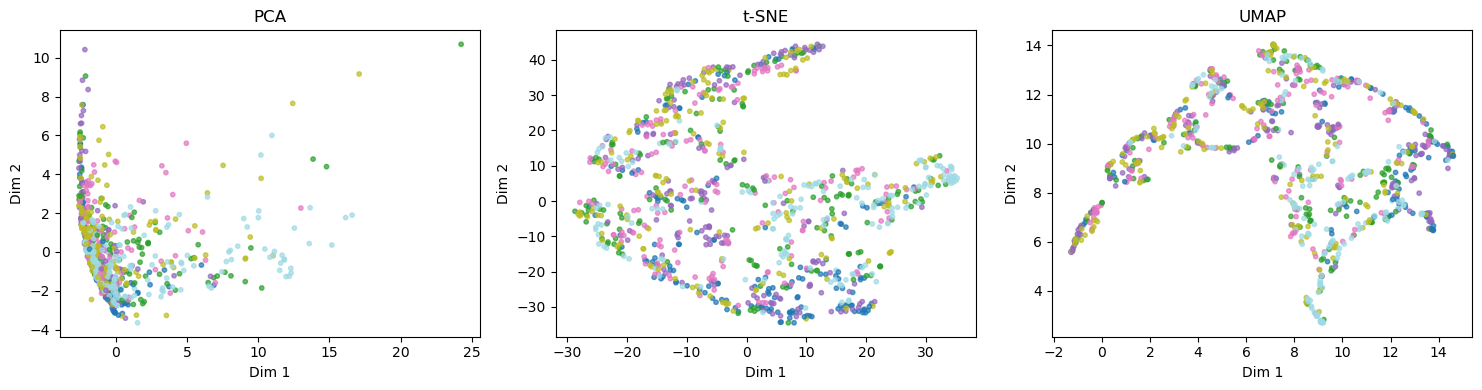

Wizualizacja dla: data_tables\features_from_Rotated.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


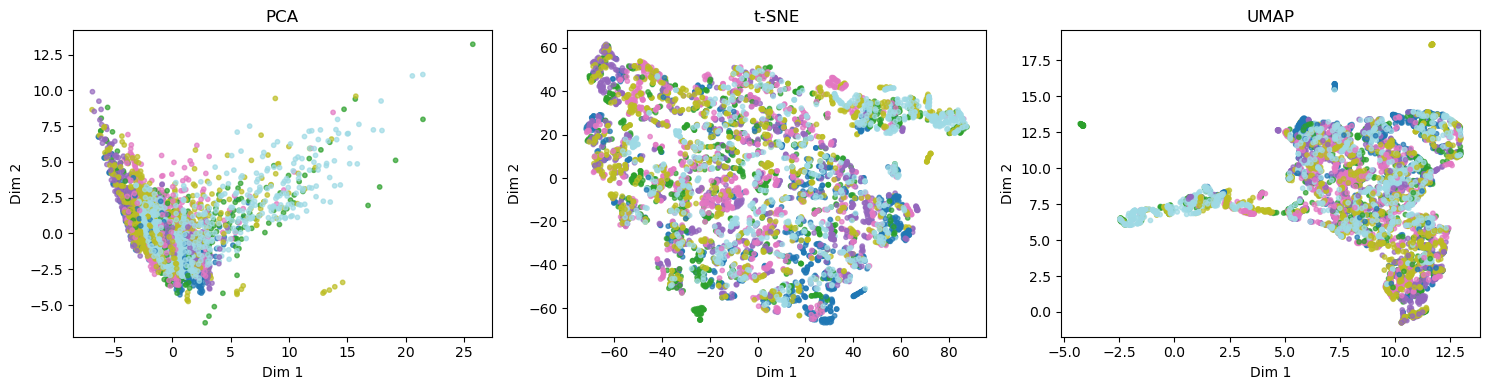

Wizualizacja dla: data_tables\features_from_Standardized2_Resized.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


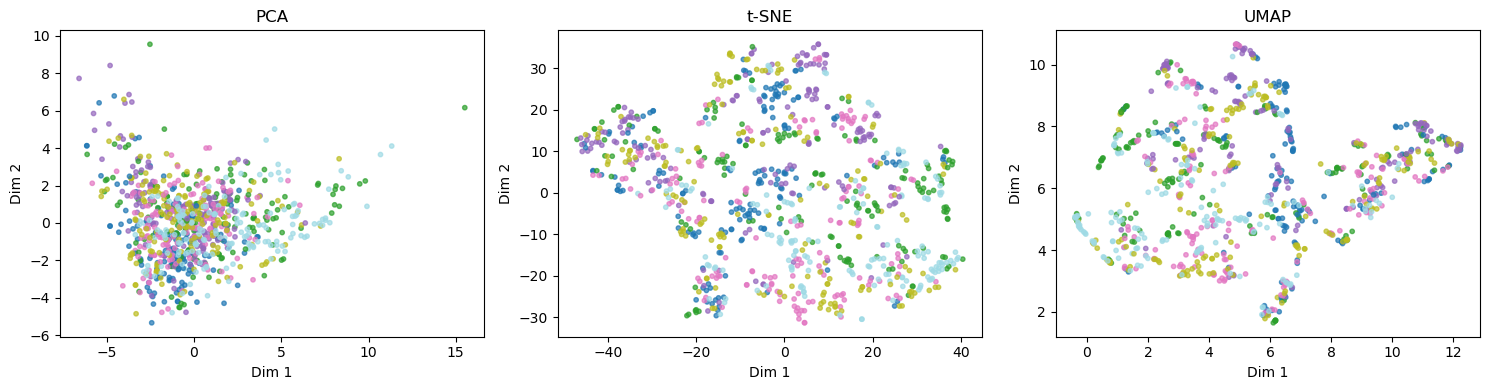

Wizualizacja dla: data_tables\features_from_Standardized_Copy.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


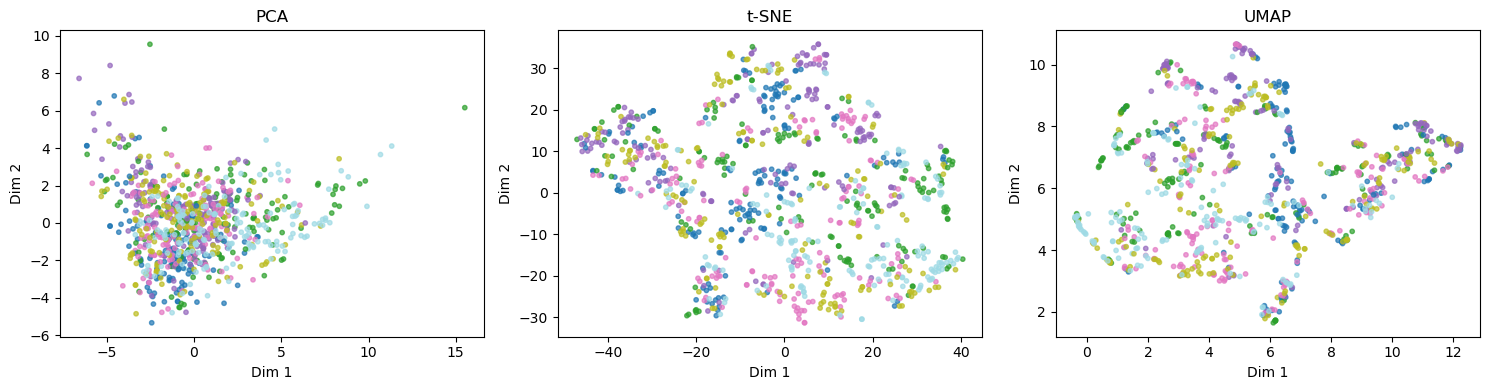

Wizualizacja dla: data_tables\features_from_Train_Test_Valid.csv


c:\Users\66891\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


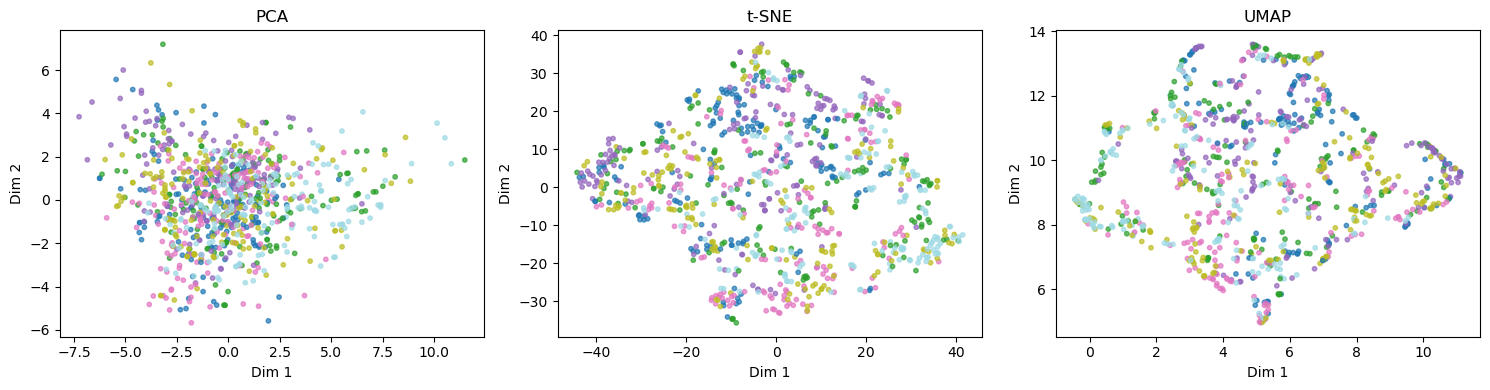

In [8]:
import glob

csv_folder = "data_tables"
csv_files = glob.glob(os.path.join(csv_folder, "features_from_*.csv"))

for csv_file in csv_files:
    print(f"Wizualizacja dla: {csv_file}")
    visualize_feature_reduction(csv_file)  # funkcja z poprzednich kroków
